<a href="https://colab.research.google.com/github/chanakyavasantha/ML_Algorithms/blob/main/Titanic_KNN.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

**KNeighbor classifier Implementation**

1.**Importing required libraries**

In [187]:
import numpy as np
import pandas as pd
import seaborn as sns
from sklearn.preprocessing import LabelEncoder
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.neighbors import KNeighborsClassifier
from sklearn import metrics

**STEP-1: DATA COLLECTION**

In [188]:
import pandas as pd
from google.colab import drive
drive.mount('/content/drive')
path='/content/drive/MyDrive/Titanic.csv'
df=pd.read_csv(path)
df

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S
...,...,...,...,...,...,...,...,...,...,...,...,...
886,887,0,2,"Montvila, Rev. Juozas",male,27.0,0,0,211536,13.0000,NaN,S
887,888,1,1,"Graham, Miss. Margaret Edith",female,19.0,0,0,112053,30.0000,B42,S
888,889,0,3,"Johnston, Miss. Catherine Helen ""Carrie""",female,NaN,1,2,W./C. 6607,23.4500,NaN,S
889,890,1,1,"Behr, Mr. Karl Howell",male,26.0,0,0,111369,30.0000,C148,C


Data Description

```
0: Survived Indicator
1: Passenger Class
2: Name
3: Sex
4: Age
5: Siblings Aboard
6: Parents Aboard
7: Fare paid in £s
```


**STEP-2: DATA WRANGLING**

In [189]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    int64  
 1   Survived     891 non-null    int64  
 2   Pclass       891 non-null    int64  
 3   Name         891 non-null    object 
 4   Sex          891 non-null    object 
 5   Age          714 non-null    float64
 6   SibSp        891 non-null    int64  
 7   Parch        891 non-null    int64  
 8   Ticket       891 non-null    object 
 9   Fare         891 non-null    float64
 10  Cabin        204 non-null    object 
 11  Embarked     889 non-null    object 
dtypes: float64(2), int64(5), object(5)
memory usage: 83.7+ KB


Checking if there are any null values

In [190]:
df.isnull().sum()

PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
Age            177
SibSp            0
Parch            0
Ticket           0
Fare             0
Cabin          687
Embarked         2
dtype: int64

In [191]:
Mean = df['Age'].mean()
df['Age'] = df['Age'].fillna(0)

In [192]:
df.set_index(["PassengerId"])

,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
PassengerId,,,,,,,,,,,
1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S
...,...,...,...,...,...,...,...,...,...,...,...
887,0,2,"Montvila, Rev. Juozas",male,27.0,0,0,211536,13.0000,NaN,S
888,1,1,"Graham, Miss. Margaret Edith",female,19.0,0,0,112053,30.0000,B42,S
889,0,3,"Johnston, Miss. Catherine Helen ""Carrie""",female,0.0,1,2,W./C. 6607,23.4500,NaN,S


**REMOVE UN WANTED COLUMNS**
- NAME
- TICKET
- CABIN
- EMBARKED

In [193]:
df = df.drop(["Name"],axis = 1)
df = df.drop(["Ticket"],axis = 1)
df = df.drop(["Cabin"],axis = 1)
df = df.drop(["Embarked"],axis = 1)

In [194]:
df.isnull().sum()

PassengerId    0
Survived       0
Pclass         0
Sex            0
Age            0
SibSp          0
Parch          0
Fare           0
dtype: int64

Encoding Columns

In [195]:
le = LabelEncoder()
label = le.fit_transform(df['Sex'])
print(len(label))

891


In [196]:
df['Sex'] = label
df

,PassengerId,Survived,Pclass,Sex,Age,SibSp,Parch,Fare
0,1,0,3,1,22.0,1,0,7.2500
1,2,1,1,0,38.0,1,0,71.2833
2,3,1,3,0,26.0,0,0,7.9250
3,4,1,1,0,35.0,1,0,53.1000
4,5,0,3,1,35.0,0,0,8.0500
...,...,...,...,...,...,...,...,...
886,887,0,2,1,27.0,0,0,13.0000
887,888,1,1,0,19.0,0,0,30.0000
888,889,0,3,0,0.0,1,2,23.4500
889,890,1,1,1,26.0,0,0,30.0000


**STEP-3: DATA ANALYSIS**

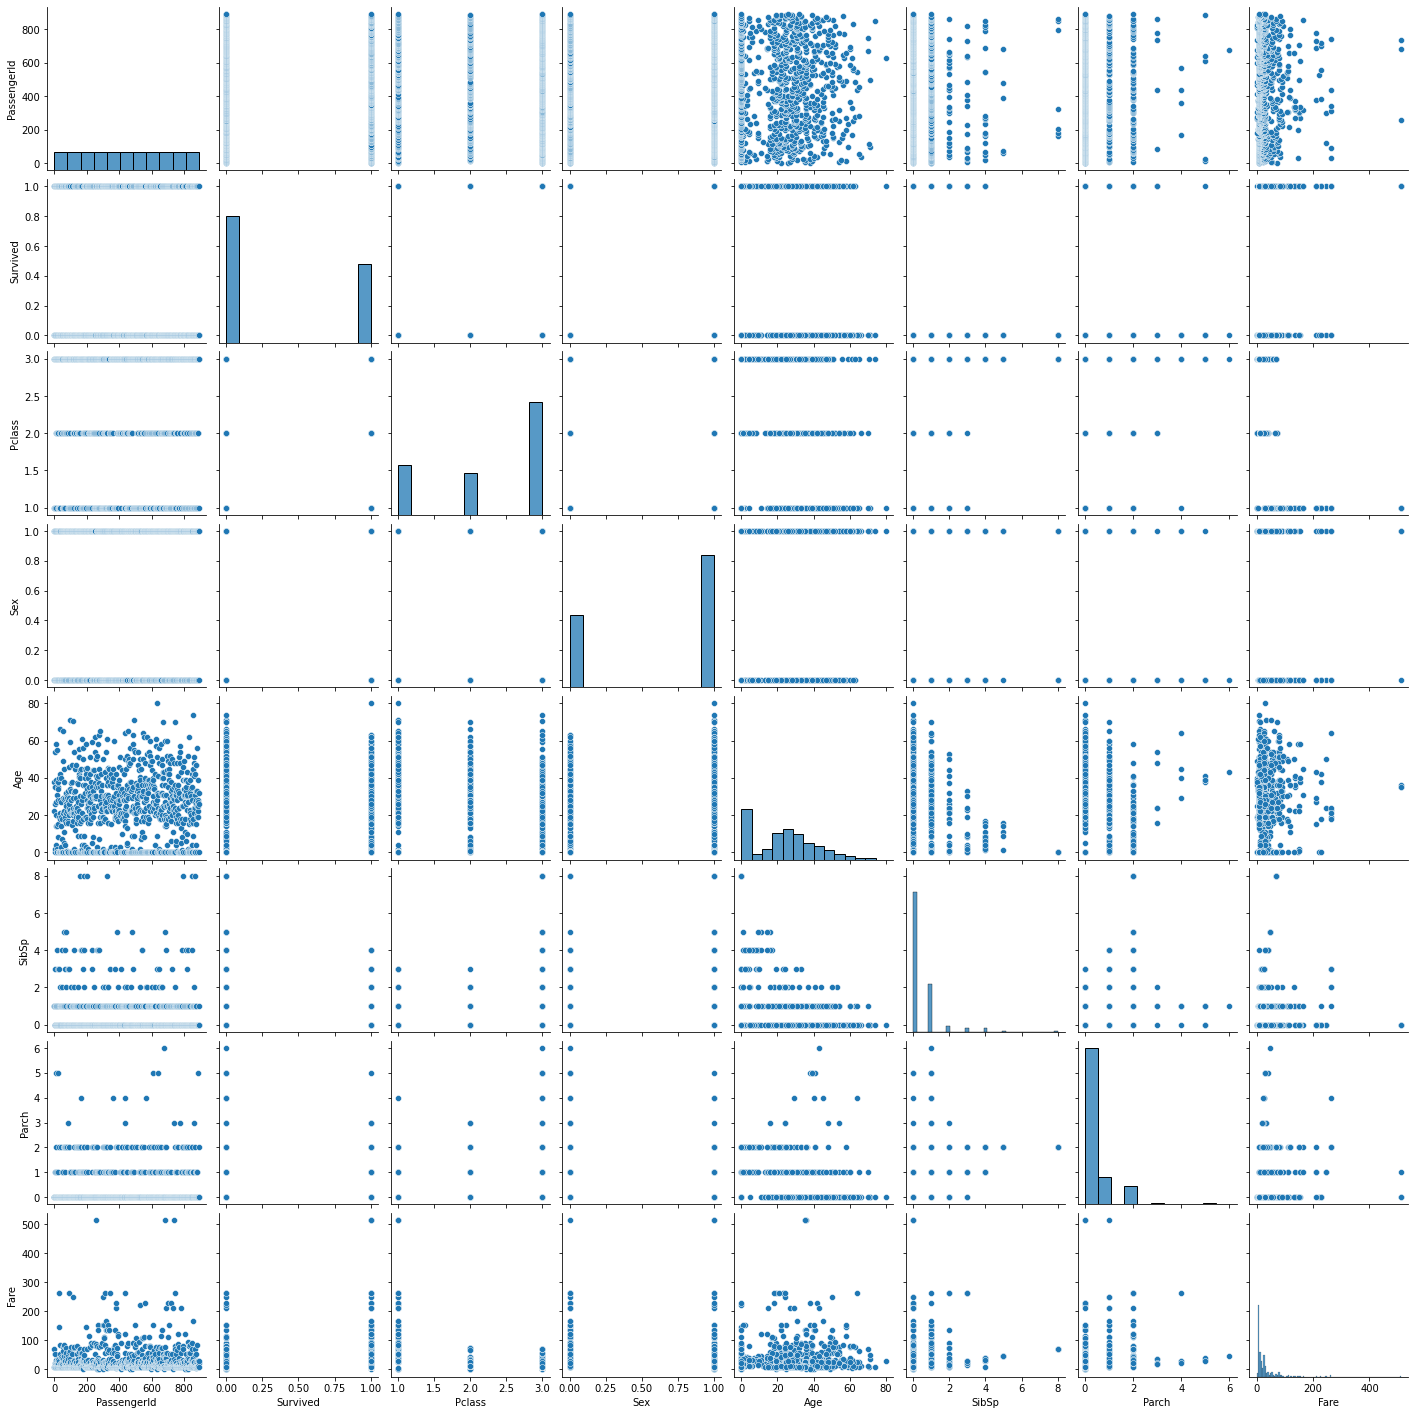

In [197]:
sns.pairplot(data = df)

In [198]:
x = df.drop(['Survived'],axis = 1)
y = df['Survived']

**STEP-4: TRAIN AND TEST MODEL**

In [199]:
for i in range(1,40,2):
    x_train,x_test,y_train,y_test = train_test_split(x,y,test_size = 0.3,random_state = 24)
    model = KNeighborsClassifier(n_neighbors = i)
    model.fit(x_train,y_train)
    y_pred = model.predict(x_test)
    print(metrics.accuracy_score(y_test,y_pred),i,end = " ")
    print()

0.5559701492537313 1 
0.6305970149253731 3 
0.6529850746268657 5 
0.6529850746268657 7 
0.6417910447761194 9 
0.6455223880597015 11 
0.6529850746268657 13 
0.6753731343283582 15 
0.6716417910447762 17 
0.6753731343283582 19 
0.6716417910447762 21 
0.6828358208955224 23 
0.6791044776119403 25 
0.6716417910447762 27 
0.6791044776119403 29 
0.6940298507462687 31 
0.6865671641791045 33 
0.6865671641791045 35 
0.6791044776119403 37 
0.6828358208955224 39 


**STEP-5: PERFORMANCE ANALYSIS**

No.of neighbors = 25

In [200]:
x_train,x_test,y_train,y_test = train_test_split(x,y,test_size = 0.3,random_state = 42)
model = KNeighborsClassifier(n_neighbors = 25)
model.fit(x_train,y_train)
y_pred = model.predict(x_test)
print(metrics.accuracy_score(y_test,y_pred))
print()

0.6567164179104478



In [201]:
y_pred

array([0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 1, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 1, 0, 1, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 1, 0, 0, 0, 1, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 1, 0, 1, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 1, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 1, 0, 1, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 1, 1, 0, 0,
       0, 0, 0, 0])

In [202]:
LI = np.array(y_test)

In [203]:
Total_pred = len(y_pred)
Correct = 0
Incorrect = 0
for i in range(len(y_pred)):
    if y_pred[i] == LI[i]:
        Correct += 1
    else:
        Incorrect += 1
print("Total : ",Total_pred)
print("Correctly predicted values in testing data: ",Correct)
print("Incorrectly predicted values in testing data: ",Incorrect)

Total :  268
Correctly predicted values in testing data:  176
Incorrectly predicted values in testing data:  92


Rebulding the model with more data

In [204]:
model = KNeighborsClassifier(n_neighbors = 25)
model.fit(x,y)
y_pred = model.predict(x_test)
print(metrics.accuracy_score(y_test,y_pred))
print()

0.7052238805970149



Accuracy increased to 70%

In [205]:
Total_pred = len(y_pred)
Correct = 0
Incorrect = 0
for i in range(len(y_pred)):
    if y_pred[i] == LI[i]:
        Correct += 1
    else:
        Incorrect += 1
print("Total : ",Total_pred)
print("Correctly predicted values in testing data: ",Correct)
print("Incorrectly predicted values in testing data: ",Incorrect)

Total :  268
Correctly predicted values in testing data:  189
Incorrectly predicted values in testing data:  79
